In [218]:
import pandas as pd;
import seaborn as sns;

import matplotlib.pyplot as plt;
import numpy as np;
from sklearn import linear_model;
from sklearn.preprocessing import StandardScaler;
from sklearn.pipeline import Pipeline;

from sklearn.neighbors import KNeighborsClassifier;

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split;
from sklearn.metrics import mean_squared_error, r2_score;


In [219]:
file = pd.read_csv('./TITANIC_FORMATTED_1.csv');
df = pd.DataFrame(file);
df

,Name,Age,Gender,Class,Fare,Survival
0,"Allen, Miss. Elisabeth Walton",29.0,Female,1st,211.34,Survived
1,"Allison, Master. Hudson Trevor",1.0,Male,1st,151.55,Survived
2,"Allison, Miss. Helen Loraine",2.0,Female,1st,151.55,Died
3,"Allison, Mr. Hudson Joshua Creighton",30.0,Male,1st,151.55,Died
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,Female,1st,151.55,Died
...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",15.0,Female,3rd,14.45,Died
1305,"Zabour, Miss. Thamine",NaN,Female,3rd,14.45,Died
1306,"Zakarian, Mr. Mapriededer",27.0,Male,3rd,7.23,Died
1307,"Zakarian, Mr. Ortin",27.0,Male,3rd,7.23,Died


In [220]:
df['Gender'] = df['Gender'].replace(regex='Male', value= 0);
df['Gender'] = df['Gender'].replace(regex='Female', value= 1);
df.head(10)

,Name,Age,Gender,Class,Fare,Survival
0,"Allen, Miss. Elisabeth Walton",29.0,1,1st,211.34,Survived
1,"Allison, Master. Hudson Trevor",1.0,0,1st,151.55,Survived
2,"Allison, Miss. Helen Loraine",2.0,1,1st,151.55,Died
3,"Allison, Mr. Hudson Joshua Creighton",30.0,0,1st,151.55,Died
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,1,1st,151.55,Died
5,"Anderson, Mr. Harry",48.0,0,1st,26.55,Survived
6,"Andrews, Miss. Kornelia Theodosia",63.0,1,1st,77.96,Survived
7,"Andrews, Mr. Thomas Jr",39.0,0,1st,0.00,Died
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.0,1,1st,51.48,Survived
9,"Artagaveytia, Mr. Ramon",71.0,0,1st,49.50,Died


In [221]:
df['Survival'] = df['Survival'].replace(regex='Survived', value= 0);
df['Survival'] = df['Survival'].replace(regex='Died', value= 1);
df.head(10)

,Name,Age,Gender,Class,Fare,Survival
0,"Allen, Miss. Elisabeth Walton",29.0,1,1st,211.34,0
1,"Allison, Master. Hudson Trevor",1.0,0,1st,151.55,0
2,"Allison, Miss. Helen Loraine",2.0,1,1st,151.55,1
3,"Allison, Mr. Hudson Joshua Creighton",30.0,0,1st,151.55,1
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,1,1st,151.55,1
5,"Anderson, Mr. Harry",48.0,0,1st,26.55,0
6,"Andrews, Miss. Kornelia Theodosia",63.0,1,1st,77.96,0
7,"Andrews, Mr. Thomas Jr",39.0,0,1st,0.00,1
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.0,1,1st,51.48,0
9,"Artagaveytia, Mr. Ramon",71.0,0,1st,49.50,1


In [222]:
df['Class'] = df['Class'].replace(regex='1st', value= 1);
df['Class'] = df['Class'].replace(regex='2nd', value= 2);
df['Class'] = df['Class'].replace(regex='3rd', value= 3);
df['Class'] = df['Class'].replace(regex='4th', value= 4);
df.head(25)

,Name,Age,Gender,Class,Fare,Survival
0,"Allen, Miss. Elisabeth Walton",29.0,1,1,211.34,0
1,"Allison, Master. Hudson Trevor",1.0,0,1,151.55,0
2,"Allison, Miss. Helen Loraine",2.0,1,1,151.55,1
3,"Allison, Mr. Hudson Joshua Creighton",30.0,0,1,151.55,1
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,1,1,151.55,1
5,"Anderson, Mr. Harry",48.0,0,1,26.55,0
6,"Andrews, Miss. Kornelia Theodosia",63.0,1,1,77.96,0
7,"Andrews, Mr. Thomas Jr",39.0,0,1,0.00,1
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.0,1,1,51.48,0
9,"Artagaveytia, Mr. Ramon",71.0,0,1,49.50,1


<AxesSubplot:>

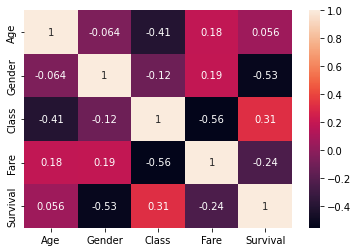

In [223]:
df_corr = df.corr()
sns.heatmap(df_corr, annot= True)

In [224]:
df.isnull().sum()

Name          0
Age         263
Gender        0
Class         0
Fare          1
Survival      0
dtype: int64

In [225]:
df = df.dropna(axis=0)
df.isnull().sum()

Name        0
Age         0
Gender      0
Class       0
Fare        0
Survival    0
dtype: int64

In [226]:
df

,Name,Age,Gender,Class,Fare,Survival
0,"Allen, Miss. Elisabeth Walton",29.0,1,1,211.34,0
1,"Allison, Master. Hudson Trevor",1.0,0,1,151.55,0
2,"Allison, Miss. Helen Loraine",2.0,1,1,151.55,1
3,"Allison, Mr. Hudson Joshua Creighton",30.0,0,1,151.55,1
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,1,1,151.55,1
...,...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",46.0,0,3,7.23,1
1304,"Zabour, Miss. Hileni",15.0,1,3,14.45,1
1306,"Zakarian, Mr. Mapriededer",27.0,0,3,7.23,1
1307,"Zakarian, Mr. Ortin",27.0,0,3,7.23,1


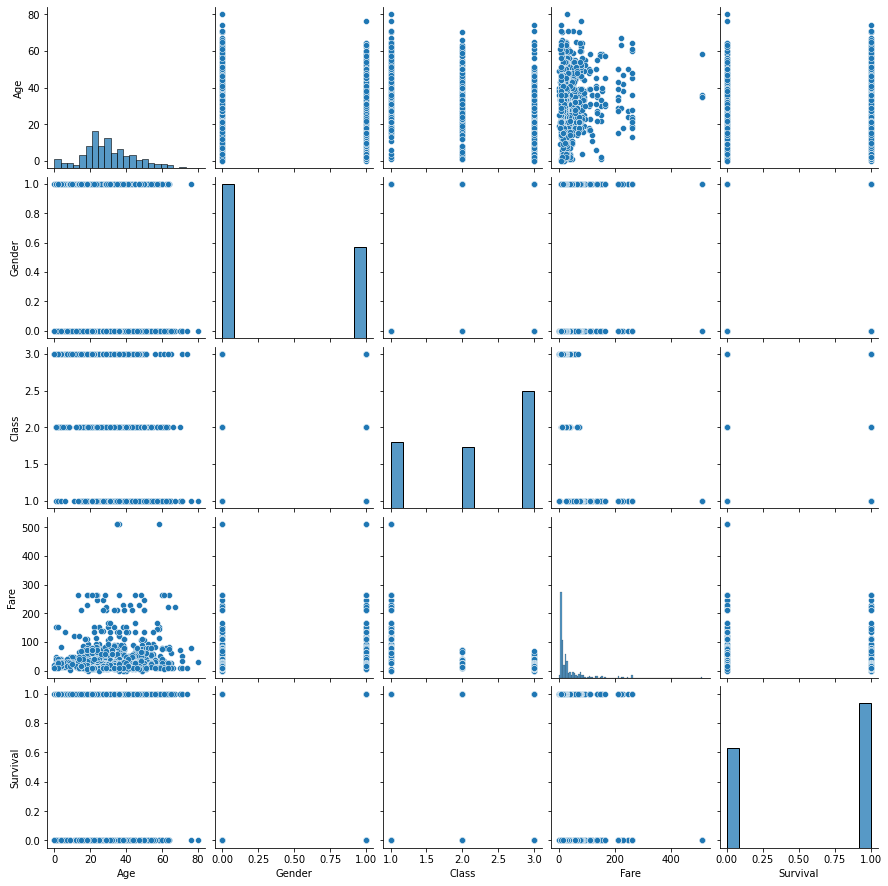

In [227]:
sns.pairplot(df, height=2.5);

Text(0.5, 0, 'Survival (Yes=0, No=1)')

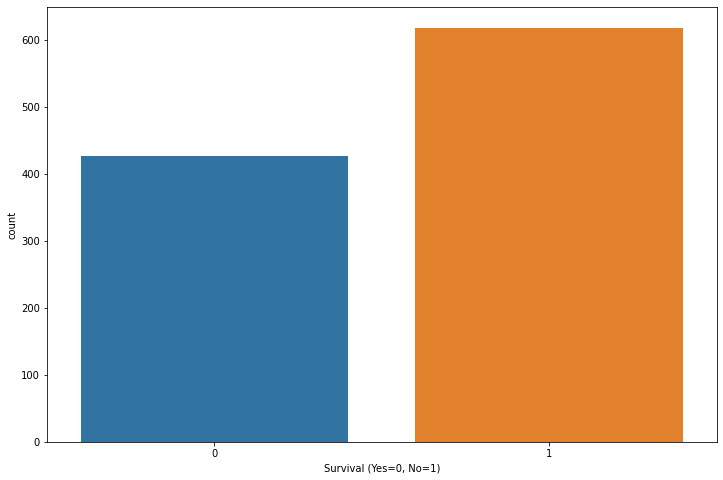

In [228]:
plt.figure(figsize= (12,8))
sns.countplot(x= 'Survival', data=df)
plt.xlabel('Survival (Yes=0, No=1)')

In [229]:
countNotSurvive = len(df[df.Survival == 1])
countSurvive = len(df[df.Survival == 0])
print("Not Survive Percentage: {:.2f}%".format((countNotSurvive / (len(df.Survival))*100)))
print("Survive Percentage: {:.2f}%".format((countSurvive / (len(df.Survival))*100)))

Not Survive Percentage: 59.14%
Survive Percentage: 40.86%


Text(0.5, 0, 'Gender (0=Male, 1=Female)')

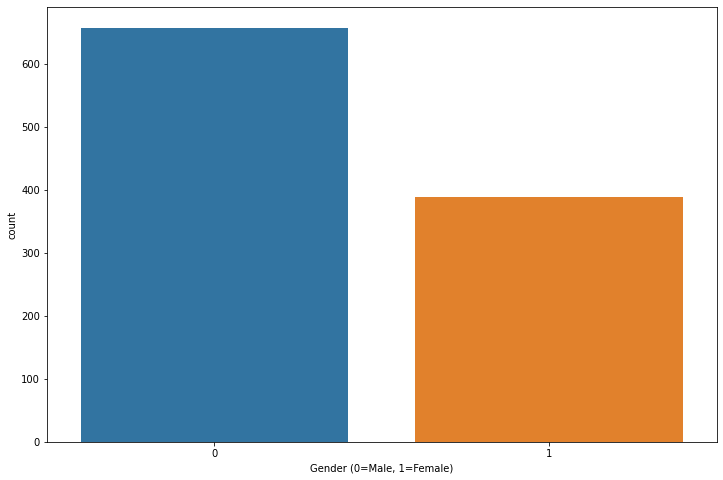

In [230]:
plt.figure(figsize= (12,8))
sns.countplot(x= 'Gender', data=df)
plt.xlabel('Gender (0=Male, 1=Female)')

In [231]:
countFemales = len(df[df.Gender == 1])
countMales = len(df[df.Gender == 0])
print("Male Percentage: {:.2f}%".format((countMales / (len(df.Gender))*100)))
print("Female Percentage: {:.2f}%".format((countFemales / (len(df.Gender))*100)))

Male Percentage: 62.87%
Female Percentage: 37.13%


In [232]:
X = df[['Age', 'Gender', 'Class']]
y = df['Survival']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((731, 3), (314, 3), (731,), (314,))

Text(0, 0.5, 'Error Rate')

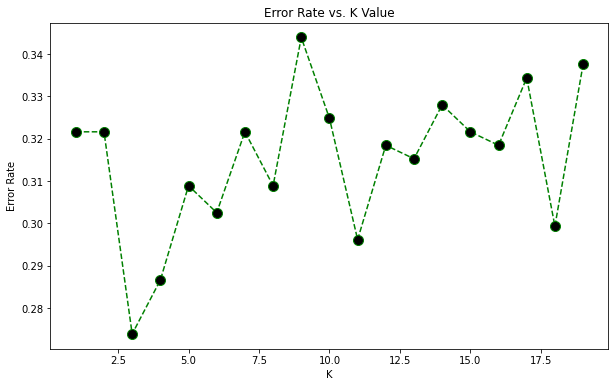

In [233]:
error_rate = []
for i in range(1,20):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),
         error_rate,color = 'green', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='black', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [234]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

<AxesSubplot:>

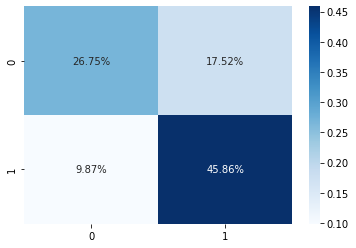

In [235]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    matrix/np.sum(matrix),
    annot=True,
    cmap='Blues',
    fmt='.2%'
)